In [ ]:
#------------------------------------------------------------------#
#
# Purpose Data Engineering Homework 2 (Paycheck Protection Program)
#
# Author Tsadimas Anargyros
#
# Date  May 2024b
#
#------------------------------------------------------------------#

In [10]:
import pandas as pd

In [11]:
# map variable types 
dtype_mapping = {
    'LoanNumber': 'str', 'DateApproved': 'str', 'BorrowerCity': 'str', 'BorrowerState': 'category',
    'BorrowerZip': 'str', 'LoanStatusDate': 'str', 'LoanStatus': 'category', 'Term': 'Int32',
    'SBAGuarantyPercentage': 'float32', 'InitialApprovalAmount': 'float32', 'CurrentApprovalAmount': 'float32',
    'UndisbursedAmount': 'float32', 'ServicingLenderName': 'str', 'ServicingLenderCity': 'str',
    'ServicingLenderState': 'category', 'JobsReported': 'float32', 'BusinessType': 'category', 'Race': 'category',
    'Ethnicity': 'category', 'Gender': 'category', 'Veteran': 'category', 'NonProfit': 'category',
    'ForgivenessAmount': 'float32', 'ForgivenessDate': 'str'
}

In [12]:
# select appropriate columns for analysis
selected_columns = ['LoanNumber', 'DateApproved', 'BorrowerName', 'BorrowerCity', 'BorrowerState', 'BorrowerZip',
    'LoanStatusDate', 'LoanStatus', 'Term', 'SBAGuarantyPercentage', 'InitialApprovalAmount',
    'CurrentApprovalAmount', 'UndisbursedAmount', 'ServicingLenderName', 'ServicingLenderCity',
    'ServicingLenderState', 'JobsReported', 'BusinessType', 'Race', 'Ethnicity', 'Gender', 'Veteran',
    'NonProfit', 'ForgivenessAmount', 'ForgivenessDate']

In [13]:
import os

# Define the folder path
folder_path = 'C:/MsC/Data Engineering/Homeworks/HWK2/CovidRecovery/RawData'
output_folder = 'C:/MsC/Data Engineering/Homeworks/HWK2/CovidRecovery/RawData'


def process_file(file_path, output_path):
    
    # Load the data with specified data types and only selected columns
    df = pd.read_csv(file_path, usecols=selected_columns, dtype=dtype_mapping)
    
    # Take a random sample of 10% of the data
    df_sample = df.sample(frac=0.1, random_state=1)
    
    # Save the sampled data of each file to a new CSV file
    df_sample.to_csv(output_path, index=False)
    return df_sample


In [14]:
# create an empty list to fill with each file
results = []

# list of files to work with
csv_files = [f"public_up_to_150k_{i}_230930.csv" for i in range(1, 13)]
csv_files = [os.path.join(folder_path, f) for f in csv_files]

In [15]:
# process each file
for file_path in csv_files:
    output_path = os.path.join(output_folder, f'sampled_{os.path.basename(file_path)}')
    df_sample = process_file(file_path, output_path)
    results.append(df_sample)

# Concatenate all DataFrames in the results list into a single DataFrame
all_sampled_data_df = pd.concat(results, ignore_index=True)

# Display the whole DataFrame info and memory usage
print(all_sampled_data_df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049977 entries, 0 to 1049976
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   LoanNumber             1049977 non-null  object  
 1   DateApproved           1049977 non-null  object  
 2   BorrowerName           1049972 non-null  object  
 3   BorrowerCity           1049963 non-null  object  
 4   BorrowerState          1049962 non-null  object  
 5   BorrowerZip            1049962 non-null  object  
 6   LoanStatusDate         1021461 non-null  object  
 7   LoanStatus             1049977 non-null  category
 8   Term                   1049977 non-null  Int32   
 9   SBAGuarantyPercentage  1049977 non-null  float32 
 10  InitialApprovalAmount  1049977 non-null  float32 
 11  CurrentApprovalAmount  1049977 non-null  float32 
 12  UndisbursedAmount      1049876 non-null  float32 
 13  ServicingLenderName    1049973 non-null  object  
 14  Se

In [16]:
# Save the final concatenated DataFrame to a CSV file
all_sampled_data_df.to_csv(os.path.join(output_folder, 'all_sampled_data.csv'), index=False)

# Display the head of the concatenated DataFrame
print(all_sampled_data_df.head())

   LoanNumber DateApproved              BorrowerName      BorrowerCity  \
0  7294738309   01/28/2021  IDEAL MANUFACTURING INC.           Hayward   
1  1501648803   04/10/2021      WIRELESS EXPRESS LLC           Phoenix   
2  8375968500   03/09/2021              JOHN SCIALLI           Phoenix   
3  1797258410   02/02/2021            RICHARD TAYLOR  Huntington Beach   
4  6308417210   04/27/2020           VISIONECT, INC.     Mountain View   

  BorrowerState BorrowerZip LoanStatusDate    LoanStatus  Term  \
0            CA  94544-6900     02/19/2022  Paid in Full    60   
1            AZ  85051-5801     10/19/2021  Paid in Full    60   
2            AZ  85018-3344     09/25/2021  Paid in Full    60   
3            CA  92646-2406     02/18/2021  Paid in Full    60   
4            CA       94041     03/23/2021  Paid in Full    24   

   SBAGuarantyPercentage  ...  ServicingLenderState  JobsReported        Race  \
0                  100.0  ...                    NY          10.0       Asian

In [17]:
# Rename the DataFrame all_sampled_data_df by assigning it to a new variable
data = all_sampled_data_df

# Delete the original DataFrame variable
del all_sampled_data_df

In [18]:
# display the first 5 rows of data
print(data.head())

   LoanNumber DateApproved              BorrowerName      BorrowerCity  \
0  7294738309   01/28/2021  IDEAL MANUFACTURING INC.           Hayward   
1  1501648803   04/10/2021      WIRELESS EXPRESS LLC           Phoenix   
2  8375968500   03/09/2021              JOHN SCIALLI           Phoenix   
3  1797258410   02/02/2021            RICHARD TAYLOR  Huntington Beach   
4  6308417210   04/27/2020           VISIONECT, INC.     Mountain View   

  BorrowerState BorrowerZip LoanStatusDate    LoanStatus  Term  \
0            CA  94544-6900     02/19/2022  Paid in Full    60   
1            AZ  85051-5801     10/19/2021  Paid in Full    60   
2            AZ  85018-3344     09/25/2021  Paid in Full    60   
3            CA  92646-2406     02/18/2021  Paid in Full    60   
4            CA       94041     03/23/2021  Paid in Full    24   

   SBAGuarantyPercentage  ...  ServicingLenderState  JobsReported        Race  \
0                  100.0  ...                    NY          10.0       Asian

In [19]:
# examine if all the values of non profit are: NaN
data['NonProfit'].isna().all()

False

In [20]:
# drop column NonProfit since 98% of its observations are missing, and SBAGuarantyPercentage since all its variables are 100
data = data.drop(columns=['NonProfit', 'SBAGuarantyPercentage'])

In [21]:
# print the dataframe again
print(data.head())

   LoanNumber DateApproved              BorrowerName      BorrowerCity  \
0  7294738309   01/28/2021  IDEAL MANUFACTURING INC.           Hayward   
1  1501648803   04/10/2021      WIRELESS EXPRESS LLC           Phoenix   
2  8375968500   03/09/2021              JOHN SCIALLI           Phoenix   
3  1797258410   02/02/2021            RICHARD TAYLOR  Huntington Beach   
4  6308417210   04/27/2020           VISIONECT, INC.     Mountain View   

  BorrowerState BorrowerZip LoanStatusDate    LoanStatus  Term  \
0            CA  94544-6900     02/19/2022  Paid in Full    60   
1            AZ  85051-5801     10/19/2021  Paid in Full    60   
2            AZ  85018-3344     09/25/2021  Paid in Full    60   
3            CA  92646-2406     02/18/2021  Paid in Full    60   
4            CA       94041     03/23/2021  Paid in Full    24   

   InitialApprovalAmount  ...  ServicingLenderCity  ServicingLenderState  \
0           92800.000000  ...             NEW YORK                    NY   
1     

In [22]:
# load packages to make plots
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


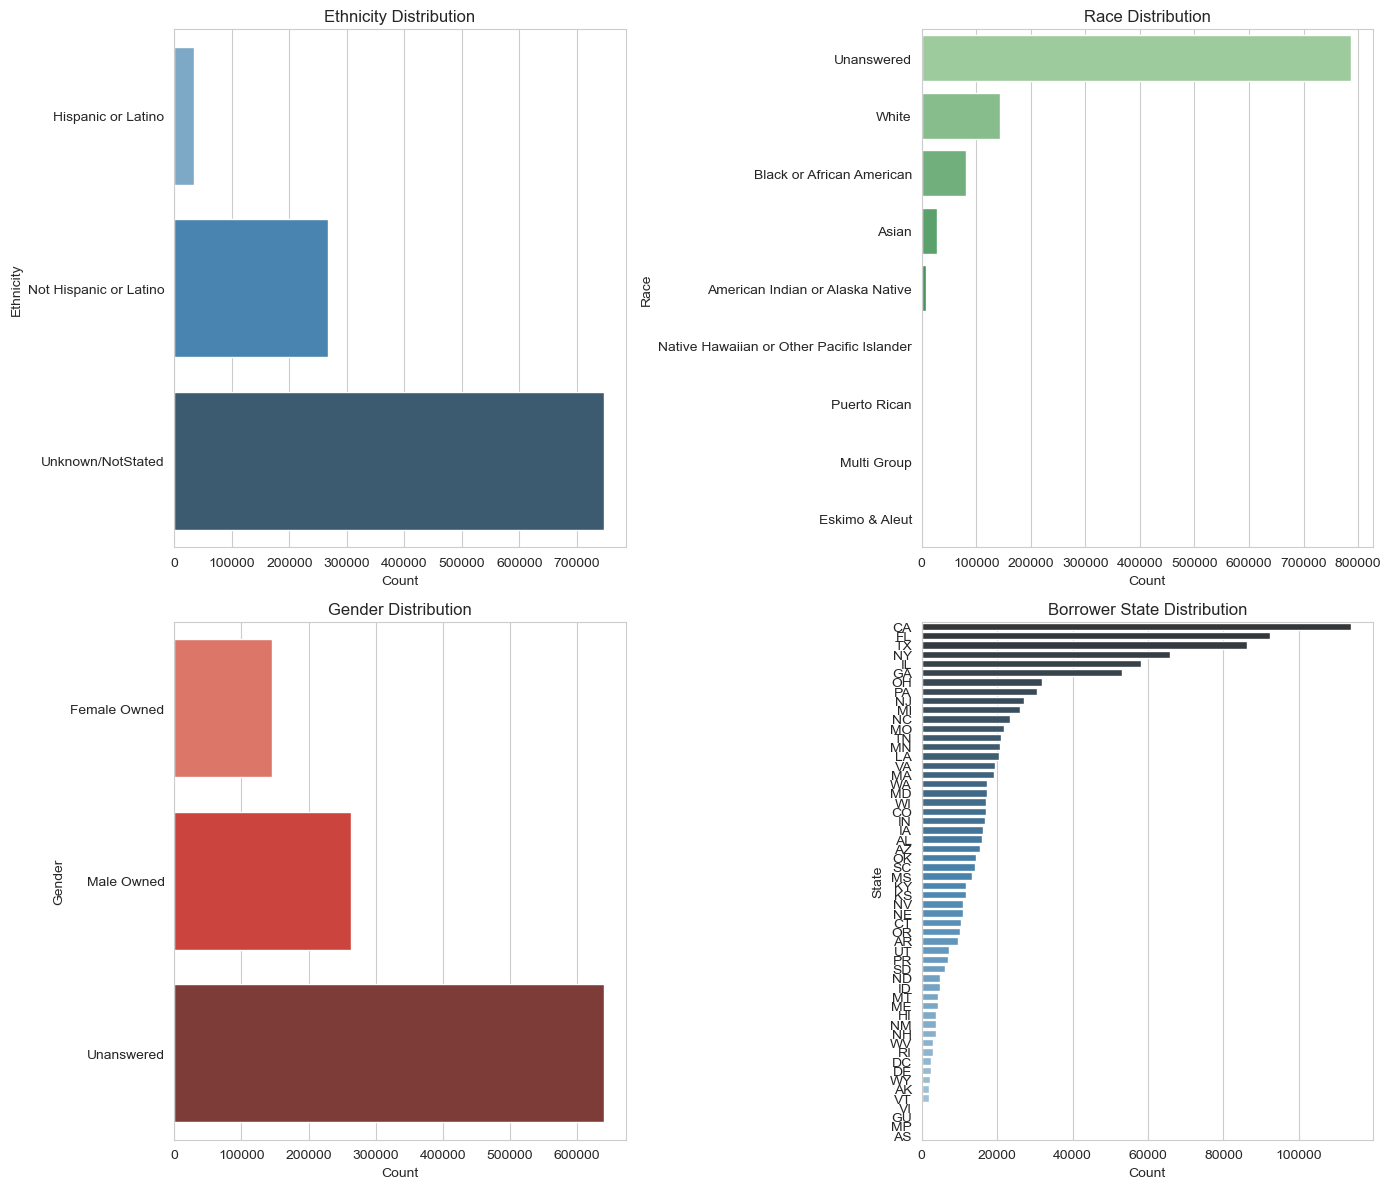

In [23]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Precompute the counts for Ethnicity
ethnicity_counts = data['Ethnicity'].value_counts()

# Plot for Ethnicity
sns.barplot(y=ethnicity_counts.index, x=ethnicity_counts.values, palette='Blues_d', ax=axs[0, 0])
axs[0, 0].set_title('Ethnicity Distribution')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_ylabel('Ethnicity')

# Precompute the counts for Race
race_counts = data['Race'].value_counts()

# Plot for Race
sns.barplot(y=race_counts.index, x=race_counts.values, palette='Greens_d', ax=axs[0, 1])
axs[0, 1].set_title('Race Distribution')
axs[0, 1].set_xlabel('Count')
axs[0, 1].set_ylabel('Race')

# Precompute the counts for Gender
gender_counts = data['Gender'].value_counts()

# Plot for Gender
sns.barplot(y=gender_counts.index, x=gender_counts.values, palette='Reds_d', ax=axs[1, 0])
axs[1, 0].set_title('Gender Distribution')
axs[1, 0].set_xlabel('Count')
axs[1, 0].set_ylabel('Gender')

# Precompute the counts for BorrowerState
state_counts = data['BorrowerState'].value_counts().reset_index()
state_counts.columns = ['BorrowerState', 'Count']

# Generate a color palette with the same number of colors as the number of states
palette = sns.color_palette("Blues_d", len(state_counts))

# Sort the palette based on the count
palette = palette[::-1]

# Plot for BorrowerState
sns.barplot(x='Count', y='BorrowerState', data=state_counts, palette=palette, ax=axs[1, 1], orient='h')
axs[1, 1].set_title('Borrower State Distribution')
axs[1, 1].set_xlabel('Count')
axs[1, 1].set_ylabel('State')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [25]:
# Step 1: Aggregate loan amounts by state
state_loan_totals = data.groupby('BorrowerState')['CurrentApprovalAmount'].sum().reset_index()
state_loan_totals.rename(columns={'CurrentApprovalAmount': 'TotalLoanAmount'}, inplace=True)
#print(state_loan_totals)

In [28]:
file_path = "C:/MsC/Data Engineering/Homeworks/HWK2/CovidRecovery/RawData/all_sampled_data.csv"

# Load a small sample of the data using ISO-8859-1 encoding
pop_est_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the DataFrame info
print(pop_est_df.info(memory_usage='deep'))

# Display the first few rows to verify
print(pop_est_df.head(20))

# Display the columns of the DataFrame
print(pop_est_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049977 entries, 0 to 1049976
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   LoanNumber             1049977 non-null  int64  
 1   DateApproved           1049977 non-null  object 
 2   BorrowerName           1049972 non-null  object 
 3   BorrowerCity           1049963 non-null  object 
 4   BorrowerState          1049962 non-null  object 
 5   BorrowerZip            1049962 non-null  object 
 6   LoanStatusDate         1021461 non-null  object 
 7   LoanStatus             1049977 non-null  object 
 8   Term                   1049977 non-null  int64  
 9   SBAGuarantyPercentage  1049977 non-null  float64
 10  InitialApprovalAmount  1049977 non-null  float64
 11  CurrentApprovalAmount  1049977 non-null  float64
 12  UndisbursedAmount      1049876 non-null  float64
 13  ServicingLenderName    1049973 non-null  object 
 14  ServicingLenderCit